Class Activity: Earthquake Data

In this project, I manipulate the earthquake data to extract statistical information from the dataset. First I imported all the nessary packages.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import norm
! pip install reverse_geocoder

Reading the data and storing it into a pandas dataframe.

In [2]:
#import and read cav file
data = pd.read_csv('all_month.csv')
# look at the top of the data
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-02-11T17:55:22.563Z,63.134200,-151.509700,0.000000,2.30,ml,NaN,NaN,NaN,0.90,...,2021-02-11T18:06:20.095Z,"46 km SSE of Denali National Park, Alaska",earthquake,NaN,0.20,NaN,NaN,automatic,ak,ak
1,2021-02-11T17:54:28.390Z,19.188168,-155.461670,34.619999,1.90,md,39.0,148.0,NaN,0.13,...,2021-02-11T17:58:04.870Z,"2 km SE of Pāhala, Hawaii",earthquake,0.63,0.75,1.840,10.0,automatic,hv,hv
2,2021-02-11T17:41:05.500Z,36.067500,-117.882000,1.610000,0.86,ml,9.0,196.0,0.054600,0.07,...,2021-02-11T17:44:44.723Z,"6km ENE of Coso Junction, CA",earthquake,0.30,0.22,0.176,10.0,automatic,ci,ci
3,2021-02-11T17:32:20.400Z,38.824501,-122.856003,1.940000,1.34,md,30.0,84.0,0.003115,0.03,...,2021-02-11T17:57:07.561Z,"10km WNW of The Geysers, CA",earthquake,0.22,0.34,0.050,6.0,automatic,nc,nc
4,2021-02-11T17:28:04.060Z,17.939800,-66.949100,6.000000,1.49,md,4.0,285.0,0.099600,0.03,...,2021-02-11T17:55:05.369Z,Puerto Rico region,earthquake,0.57,1.43,0.050,3.0,reviewed,pr,pr


In [3]:
#looking at the tail of the data
data.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
10823,2021-01-12T18:40:38.818Z,38.049000,-118.774300,8.20,1.50,ml,22.0,100.5,0.293000,0.134,...,2021-01-13T02:31:24.967Z,"32 km ENE of Lee Vining, California",earthquake,NaN,2.60,0.240,7.0,reviewed,nn,nn
10824,2021-01-12T18:38:47.600Z,39.432000,-110.327667,-1.21,1.34,md,5.0,148.0,0.008136,0.050,...,2021-01-12T20:24:46.440Z,"14 km SSE of Sunnyside, Utah",earthquake,1.03,0.34,0.105,5.0,reviewed,uu,uu
10825,2021-01-12T18:28:47.411Z,60.546900,-152.096700,84.50,1.40,ml,NaN,NaN,NaN,0.370,...,2021-01-26T05:31:28.383Z,"43 km W of Salamatof, Alaska",earthquake,NaN,0.70,NaN,NaN,reviewed,ak,ak
10826,2021-01-12T18:24:22.430Z,32.752167,-115.826833,8.47,1.06,ml,18.0,100.0,0.128400,0.110,...,2021-01-13T18:19:40.081Z,"16km E of Ocotillo, CA",earthquake,0.20,0.74,0.140,6.0,reviewed,ci,ci
10827,2021-01-12T18:17:36.605Z,-3.062900,136.877700,28.29,5.80,mww,NaN,14.0,3.860000,0.730,...,2021-02-09T18:26:21.605Z,"Papua, Indonesia",earthquake,6.50,3.30,0.073,18.0,reviewed,us,us


In [4]:
#looking at the information of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10828 entries, 0 to 10827
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             10828 non-null  object 
 1   latitude         10828 non-null  float64
 2   longitude        10828 non-null  float64
 3   depth            10828 non-null  float64
 4   mag              10827 non-null  float64
 5   magType          10827 non-null  object 
 6   nst              7337 non-null   float64
 7   gap              8468 non-null   float64
 8   dmin             7512 non-null   float64
 9   rms              10827 non-null  float64
 10  net              10828 non-null  object 
 11  id               10828 non-null  object 
 12  updated          10828 non-null  object 
 13  place            10828 non-null  object 
 14  type             10828 non-null  object 
 15  horizontalError  7310 non-null   float64
 16  depthError       10828 non-null  float64
 17  magError    

In [5]:
#changing the time of the data to year-month-date
data['time'] =pd.DatetimeIndex(data['time']).date

In [6]:
#sorting by datetime and from most current to least current
df = data.sort_values(by='time', ascending=False)
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-02-11,63.134200,-151.509700,0.00,2.30,ml,NaN,NaN,NaN,0.90,...,2021-02-11T18:06:20.095Z,"46 km SSE of Denali National Park, Alaska",earthquake,NaN,0.20,NaN,NaN,automatic,ak,ak
129,2021-02-11,-22.440500,170.944900,10.00,4.80,mb,NaN,107.0,8.149000,0.81,...,2021-02-11T05:41:00.040Z,southeast of the Loyalty Islands,earthquake,6.80,1.80,0.102000,30.0,reviewed,us,us
120,2021-02-11,38.819000,-122.766670,2.15,0.15,md,8.0,106.0,0.011730,0.01,...,2021-02-11T06:32:04.607Z,"4km W of Cobb, CA",earthquake,0.40,1.08,0.080000,2.0,automatic,nc,nc
121,2021-02-11,38.809166,-122.789001,2.95,1.02,md,23.0,31.0,0.005067,0.02,...,2021-02-11T06:20:05.543Z,"4km NW of The Geysers, CA",earthquake,0.25,0.47,0.170000,4.0,automatic,nc,nc
122,2021-02-11,35.605333,-117.488167,6.35,1.00,ml,12.0,149.0,0.028300,0.15,...,2021-02-11T05:59:26.744Z,"17km E of Ridgecrest, CA",earthquake,0.47,0.70,0.090000,10.0,automatic,ci,ci
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10773,2021-01-12,60.040667,-153.111667,0.82,-0.54,ml,4.0,153.0,NaN,0.06,...,2021-01-13T02:56:16.290Z,"62 km ENE of Pedro Bay, Alaska",earthquake,0.31,0.39,0.198613,3.0,reviewed,av,av
10772,2021-01-12,60.049500,-153.118333,2.21,-0.94,ml,4.0,170.0,NaN,0.08,...,2021-01-13T03:00:19.520Z,"62 km ENE of Pedro Bay, Alaska",earthquake,0.63,1.18,0.119753,3.0,reviewed,av,av
10771,2021-01-12,38.836000,-122.808000,1.62,0.49,md,33.0,51.0,0.012690,0.04,...,2021-01-20T03:07:07.811Z,"8km WNW of Cobb, CA",earthquake,0.17,0.27,0.315000,5.0,reviewed,nc,nc
10770,2021-01-12,60.087700,-153.173200,4.80,0.70,ml,NaN,NaN,NaN,0.47,...,2021-01-26T05:31:31.686Z,"61 km ENE of Pedro Bay, Alaska",earthquake,NaN,0.80,NaN,NaN,reviewed,ak,ak


Looking at all of the statistical informations on the data as a whole without any manipulation to the data.

In [7]:
#looking at all of the stats of the whole data without any filtering
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,10828.000000,10828.000000,10828.000000,10827.000000,7337.000000,8468.000000,7512.000000,10827.000000,7310.000000,10828.000000,7717.000000,8078.000000
mean,38.181062,-113.004644,22.254684,1.664963,21.976830,117.367593,0.573722,0.285331,1.634787,2.775227,0.236839,15.561525
std,19.334327,61.602443,49.948975,1.184936,16.163812,64.995824,2.184867,0.270946,2.954782,49.001211,0.373911,25.605368
min,-62.387900,-179.955500,-4.700000,-1.310000,2.000000,11.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.000000
25%,33.488583,-149.772400,4.280000,0.900000,10.000000,70.000000,0.023110,0.100000,0.260000,0.410000,0.108000,5.000000
50%,38.146600,-118.854500,8.450000,1.410000,18.000000,101.000000,0.065755,0.180000,0.450000,0.700000,0.163000,9.000000
75%,51.865208,-115.721750,16.730000,2.070000,28.000000,149.000000,0.186000,0.420000,0.840000,1.510000,0.230000,18.000000
max,85.081800,179.649100,644.900000,7.700000,199.000000,351.550000,52.111000,2.760000,23.200000,5041.100000,5.920000,515.000000


In [17]:
np.nanmedian(df['mag'], axis=0) #looking to find the median of dataset

1.41

Earthquake Magnitude:
Max: 7.7
Min:: -1.31
Mean: 1.6649625935854808
Median: 1.41
25th percentile: 0.9
75th percentile: 2.07

In [8]:
#all of the different columns in the dataset
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

Part b requires finding the average magnitude where the quake type was ‘ml’. I did this by making
a new dataframe with just ‘magtype’ equal to ‘ml’ that contains all of the info. Then I just found the mean of the
‘mag’ column.

In [9]:
ml = df[df["magType"]=="ml"] #looking for all the ml in the list

In [10]:
ml['mag'].mean() #avg of mag with all magType of ml

1.364737683476239

In [11]:
# looking at all of the stats that magType is ml
ml.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,6881.000000,6881.000000,6881.000000,6881.000000,4325.000000,4522.000000,4090.000000,6881.000000,3365.000000,6881.000000,4098.000000,4134.000000
mean,46.025911,-130.831612,18.458183,1.364738,22.561156,108.608752,0.110494,0.299090,0.637809,2.755780,0.220913,13.705128
std,12.595242,22.075569,27.552971,0.732066,17.205827,58.021042,0.194008,0.229845,1.121705,61.350005,0.387949,15.540240
min,-24.132200,-179.532900,-4.700000,-1.310000,2.000000,11.000000,0.000000,0.000300,0.090000,0.000000,0.000000,0.000000
25%,35.607667,-150.919500,5.000000,0.900000,11.000000,68.000000,0.031000,0.130000,0.230000,0.370000,0.121000,5.000000
50%,43.708500,-118.099333,8.400000,1.330000,18.000000,93.000000,0.062695,0.210000,0.340000,0.600000,0.171000,9.000000
75%,60.040800,-116.501500,15.260000,1.800000,28.000000,138.757500,0.122394,0.430000,0.560000,1.120000,0.230000,17.000000
max,69.867700,178.976100,239.000000,5.400000,145.000000,351.550000,3.067000,2.760000,13.300000,5041.100000,5.920000,247.000000


In [18]:
np.nanmedian(ml['mag'], axis=0) #looking to find the median of dataset

1.33

In [19]:
#Find the date and location of the largest earthquake
maxquake = df[df['mag'] == np.max(df['mag'], axis=0)]

print(maxquake['time'])

#lat and long of the maxquake

maxlat = maxquake['latitude'].to_numpy()
maxlong = maxquake['longitude'].to_numpy()
coordinates = (maxlat[0], maxlong[0])

location = reverse_geocoder.search(coordinates)
dflocation = pd.DataFrame(location)

print(dflocation['cc'])

340    2021-02-10
Name: time, dtype: object
Loading formatted geocoded file...
0    NC
Name: cc, dtype: object


Text(0.5, 0, 'Magnitude')

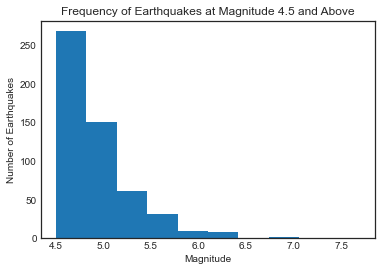

In [21]:
#plotting a histogram that meets the requirement of mag > 4.5
greaterthan = df[df["mag"] >= 4.5]
%matplotlib inline
plt.style.use('seaborn-white')
plt.hist(greaterthan['mag']);
plt.title("Frequency of Earthquakes at Magnitude 4.5 and Above")
plt.ylabel("Number of Earthquakes")
plt.xlabel("Magnitude")

/Users/qiwi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/qiwi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'Magnitude')

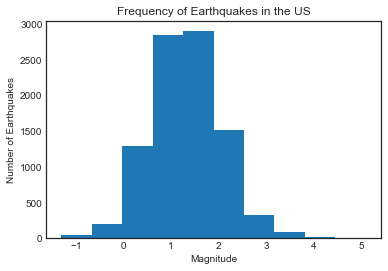

In [24]:
allcoords = data[['latitude', 'longitude']].to_numpy()

coords = map(tuple, allcoords)
tuplecoords = tuple(coords)
locdata = reverse_geocoder.search((tuplecoords))

dflocdata = pd.DataFrame(locdata)

datawcc = pd.concat([data, dflocdata['cc']], axis=1)

usquakes = datawcc[datawcc['cc'] == 'US']

%matplotlib inline
plt.style.use('seaborn-white')
#plt.hist(usSigQuakes);
plt.hist(usquakes['mag']);
plt.title("Frequency of Earthquakes in the US")
plt.ylabel("Number of Earthquakes")
plt.xlabel("Magnitude")